In [3]:
from sympy import *
from itertools import *
import LieSympy as lp
import numpy as np
import copy as copy
import time
init_printing()

In [13]:
g = lp.groupAction([['x'],['u','P']],['a','b','psi'],3)

In [14]:
# Define the expressions in terms of variables in the lp module
X_expr = cos(lp.psi)*lp.x-sin(lp.psi)*lp.u+lp.a
U_expr =  sin(lp.psi)*lp.x+cos(lp.psi)*lp.u+lp.b
P_expr = lp.P+lp.psi

# Define the group transformation, identity, and cross-section
T = [X_expr, U_expr, P_expr]
grp_id = [0,0,0]
K = [[0,0,0],[lp.x,lp.u,lp.P]]

# Instantiate the group action object
g.Def_transformation(T,grp_id,K)

In [23]:
k = g.transformed_subs_backward[lp.ux].xreplace(g.frame)

In [31]:
w = (cos(lp.P)+lp.ux*sin(lp.P))

In [33]:
L = simplify((w*k**2).xreplace(g.master_function_to_symbol))

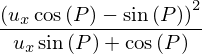

In [65]:
L

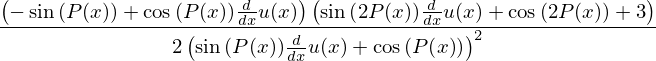

In [58]:
simplify(diff(L,ux)).subs(g.master_symbol_to_function)

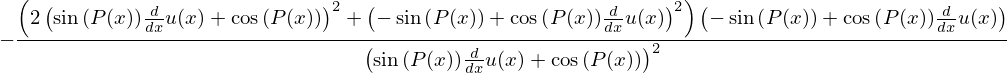

In [60]:
simplify(diff(L,P)).subs(g.master_symbol_to_function)

In [46]:
u = symbols('u')
ux = symbols('u_x')
P = symbols('P')
Px = symbols('P_x')

In [67]:
print(latex(diff(simplify(diff(L,ux)).subs(g.master_symbol_to_function),lp.x).xreplace(g.master_function_to_symbol)))

\frac{\left(u_{x} \cos{\left (P \right )} - \sin{\left (P \right )}\right) \left(2 P_{x} u_{x} \cos{\left (2 P \right )} - 2 P_{x} \sin{\left (2 P \right )} + u_{xx} \sin{\left (2 P \right )}\right)}{2 \left(u_{x} \sin{\left (P \right )} + \cos{\left (P \right )}\right)^{2}} + \frac{\left(u_{x} \sin{\left (2 P \right )} + \cos{\left (2 P \right )} + 3\right) \left(- P_{x} u_{x} \sin{\left (P \right )} - P_{x} \cos{\left (P \right )} + u_{xx} \cos{\left (P \right )}\right)}{2 \left(u_{x} \sin{\left (P \right )} + \cos{\left (P \right )}\right)^{2}} + \frac{\left(u_{x} \cos{\left (P \right )} - \sin{\left (P \right )}\right) \left(u_{x} \sin{\left (2 P \right )} + \cos{\left (2 P \right )} + 3\right) \left(- 2 P_{x} u_{x} \cos{\left (P \right )} + 2 P_{x} \sin{\left (P \right )} - 2 u_{xx} \sin{\left (P \right )}\right)}{2 \left(u_{x} \sin{\left (P \right )} + \cos{\left (P \right )}\right)^{3}}


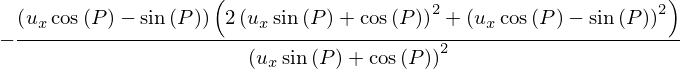

In [69]:
simplify(diff(L,P)).subs(g.master_symbol_to_function).xreplace(g.master_function_to_symbol)

In [55]:
I_2 = g.transformed_subs_backward[lp.uxx].xreplace(g.frame)
I_1 = g.transformed_subs_backward[lp.ux].xreplace(g.frame)
J_1 = g.transformed_subs_backward[lp.Px].xreplace(g.frame)

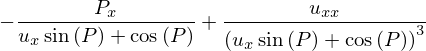

In [66]:
simplify(I_2 - J_1)

### Testing Area

In [15]:
g.inv_Euler()

TypeError: 'int' object has no attribute '__getitem__'

In [16]:
g.invariant_Hamilton()

TypeError: 'int' object has no attribute '__getitem__'

### Testing the 3D case

In [2]:
x = symbols('x')

g = lp.groupAction([['x'],['y','u','m','n','o','p','q','r','s','t','v']],
                   ['a','b','c','d','e','f','g','h','i','j','k','l'],3)

# Define the expressions in terms of variables in the lp module
X_expr = lp.d*lp.x + lp.e*lp.y + lp.f*lp.u + lp.a
Y_expr = lp.g*lp.x + lp.h*lp.y + lp.i*lp.u + lp.b
U_expr = lp.j*lp.x + lp.k*lp.y + lp.l*lp.u + lp.c

expr_11 = lp.m*lp.a+lp.p*lp.b+lp.s*lp.c
expr_12 = lp.n*lp.a+lp.q*lp.b+lp.t*lp.c
expr_13 = lp.o*lp.a+lp.r*lp.b+lp.v*lp.c
expr_21 = lp.m*lp.d+lp.p*lp.e+lp.s*lp.f
expr_22 = lp.n*lp.d+lp.q*lp.e+lp.t*lp.f
expr_23 = lp.o*lp.d+lp.r*lp.e+lp.v*lp.f
expr_31 = lp.m*lp.g+lp.p*lp.h+lp.s*lp.i
expr_32 = lp.n*lp.g+lp.q*lp.h+lp.t*lp.i
expr_33 = lp.o*lp.g+lp.r*lp.h+lp.v*lp.i

T = [X_expr, Y_expr, U_expr, expr_11, expr_12, expr_13, expr_21, expr_22, expr_23, expr_31, expr_32, expr_33]
grp_id = [0,0,0,1,0,0,0,1,0,0,0,1]
K = [[0,0,0,1,0,0,0,1,0,0,0,1],[lp.x,lp.y,lp.u]]
# Instantiate the group action object
g.Def_transformation(T,grp_id,K)

In [3]:
g.vectors = [[1+0*x,0*x,0*x,0*x,0*x,0*x,0*x,0*x,0*x,0*x,0*x,0*x],
             [0*x,1+0*x,0*x,0*x,0*x,0*x,0*x,0*x,0*x,0*x,0*x,0*x],
             [0*x,0*x,1+0*x,0*x,0*x,0*x,0*x,0*x,0*x,0*x,0*x,0*x],
             [lp.y,-lp.x,0*x,-lp.p,-lp.q,-lp.r,lp.m,lp.n,lp.o,0*x,0*x,0*x],
             [lp.u,0*x,-lp.x,-lp.s,-lp.t,-lp.v,0*x,0*x,0*x,lp.m,lp.n,lp.o],
             [0*x,lp.u,-lp.y,0*x,0*x,0*x,-lp.s,-lp.t,-lp.v,lp.p,lp.q,lp.r]]

In [30]:
# Define the expressions in terms of variables in the lp module
X_expr = lp.d*lp.x + lp.e*lp.y + lp.f*lp.u + lp.a
Y_expr = lp.g*lp.x + lp.h*lp.y + lp.i*lp.u + lp.b
U_expr = lp.j*lp.x + lp.k*lp.y + lp.l*lp.u + lp.c

expr_11 = lp.F11*lp.a+lp.F21*lp.b+lp.F31*lp.c
expr_12 = lp.F12*lp.a+lp.F22*lp.b+lp.F32*lp.c
expr_13 = lp.F13*lp.a+lp.F23*lp.b+lp.F33*lp.c
expr_21 = lp.F11*lp.d+lp.F21*lp.e+lp.F31*lp.f
expr_22 = lp.F12*lp.d+lp.F22*lp.e+lp.F32*lp.f
expr_23 = lp.F13*lp.d+lp.F23*lp.e+lp.F33*lp.f
expr_31 = lp.F11*lp.g+lp.F21*lp.h+lp.F31*lp.i
expr_32 = lp.F12*lp.g+lp.F22*lp.h+lp.F32*lp.i
expr_33 = lp.F13*lp.g+lp.F23*lp.h+lp.F33*lp.i

In [25]:
# Define the group transformation, identity, and cross-section
T = [X_expr, Y_expr, U_expr, expr_11, expr_12, expr_13, expr_21, expr_22, expr_23, expr_31, expr_32, expr_33]
grp_id = [0,0,0,1,0,0,0,1,0,0,0,1]
K = [[0,0,0,1,0,0,0,1,0,0,0,1],[lp.x,lp.y,lp.u]]
t0 = time.time()
# Instantiate the group action object
g.Def_transformation(T,grp_id,K)
t1 = time.time()

In [27]:
g.vectors = [[1+0*x,0*x,0*x,0*x,0*x,0*x,0*x,0*x,0*x,0*x,0*x,0*x],
             [0*x,1+0*x,0*x,0*x,0*x,0*x,0*x,0*x,0*x,0*x,0*x,0*x],
             [0*x,0*x,1+0*x,0*x,0*x,0*x,0*x,0*x,0*x,0*x,0*x,0*x],
             [lp.y,-lp.x,0*x,-lp.F21,-lp.F22,-lp.F23,lp.F11,lp.F12,lp.F13,0*x,0*x,0*x],
             [lp.u,0*x,-lp.x,-lp.F31,-lp.F32,-lp.F33,0*x,0*x,0*x,lp.F11,lp.F12,lp.F13],
             [0*x,lp.u,-lp.y,0*x,0*x,0*x,-lp.F31,-lp.F32,-lp.F33,lp.F21,lp.F22,lp.F23]]

In [5]:
for i in range(3):
    print(latex(g.Lie_contact_diff(g.vectors[3+i],0,1)))

- o \vartheta^{y} - \vartheta^{p}
- o \vartheta^{u} - \vartheta^{s}
0


### Prolongation non-class version

In [4]:
x=symbols('x')
y=symbols('y')
u=symbols('u')

a = symbols('a')
b = symbols('b')
c = symbols('c')
d = symbols('d')
e = symbols('e')
f = symbols('f')
g = symbols('g')
h = symbols('h')
i = symbols('i')

In [5]:
import prolong_Fast as pf

In [6]:
A = pf.Prolong(['x'],['y','u','a','b','c','d','e','f','g','h','i'],[0,-u,y,0,0,0,-g,-h,-i,d,e,f],1)

In [7]:
A

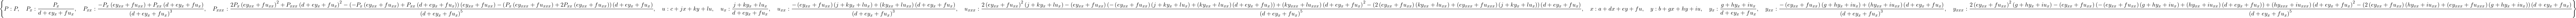

In [19]:
g.transformed_subs_backward